## Day 4 Hypothesis testing, Interval estimation

### 0. Contents
Hypothesis testing: Likelihood-Ratio test

Inteerval estimation: likelihood-based inference on one paramter. Joint confidence region for two paramters. Profile likelihood. Wald C.I. with normal approximation.  
### 1. Statistical inference
Statistical inference often refers to the procedures of point estimation, interval estimation, and hypothesis testing. For point estimation, it simply means to finding the best guess for a parameter. This is achieved by maximising the log-likelihood function as described in the previous notebook. The point estimate is usually accompanied by a confidence interval (C.I.) to reflect how certain we are surrounding the "best guess". Hypothesis testing is heavily involved in model selection and simplification, or testing for the difference between treatment groups in a clinical trial. Luckily, likelihood has all these covered. 

### 2. Likelihood-Ratio test
Likelihood-Ratio test (LRT) is a likelihood-based hypothesis testing procedure. It applies to two *nested* models aiming to decide which one we should choose from. Let M1 and M2 be two models, and that M1 is nested in M2 (i.e. M1 is a special case of M2). We also assume $d1$ and $d2$ are the number of free parameters for M1 and M2 respectively, with $d2>d1$. The LRT statistic $D$ is twice the difference of their maximised log-likelihoods, and $D$ approximately follows a $\chi^2$ distribution with $(d2-d1)$ degrees of freedom. 

The procedure of performing a LRT is as follows: 
1) Fit M1 to the data, record the maximised log-likelihood value, let us call it $\ln(L1)$. The parameter estimates are unimportant here. 
2) Fit M2 to the same data, separatly, record the maximised log-likelihood value $\ln(L2)$. Note that $\ln(L2)\geqslant\ln(L1)$. 
3) Compute the LRT statitsic $D=2[\ln(L2)-\ln(L1)]$. 
4) Look up $\chi^2_{d2-d1}$ table for a critical value. Accept M1 as the simplidfied model if $D$ is smaller than the critical value.

The intuition of $D$ is to measure the difference in explanatory power between the two models. M2, being the full model, must fit the data better with a larger maximised log-likelihood. M1 has fewer parameters hence poorer fit. If the parameters dropped by M1 are unimportant, then there should be little difference between the two models, hence a small value of $D$. With small $D$ we tend to accept M1 as the simplified model. 

In today's practical we will apply LRT to test for the signficance of the intercept term in a linear regression. In this case, the full model M2 is the three-parameter model we fitted yesterday, whereas M1 is the simplified model with $a=0$. We will also revisit the coin tossing example to test for (or against) the fair-coin hypothesis. 

### 3. Interval estimation
#### 3.1 Likelihood-based confidence interval
Following on the discussion on LRT, it will accept the simpler model if $D$ is smaller than half of the critical value of $\chi^2_1$, assuming M1 and M2 differ by one parameter. At $\alpha=0.05$, the critical value is 3.84, hence the decision boundary is $D<3.84/2=1.92$, or 2 units if we are a bit conservative. 

With this idea, we can perform a series of LRTs against many M1 with different $\tilde{\theta}$ values. As we move $\tilde{\theta}$ further away from $\hat{\theta}$, the $D$ statistic will get larger and eventually hit the decision boundary to reject M1. As a result, the 95% C.I. for $\theta$ in the univariate case is a collection of $\tilde{\theta}$ values whose M1 remain accepted by LRT. Or in other words, a collection of $\tilde{\theta}$ whose log-likelihood is within 1.92 or 2 units from the peak of the log-likelihood curve $l(\hat{\theta})$. 

Example: In a coin tossing experiment we obtained 7 heads and 3 tails. On day 2 we visualised the log-likelihood function. We also learnt that the maximised log-likelihood is $l(\hat{p})=l(0.7)$. If we draw a horizontal line 2 units below the peak: 

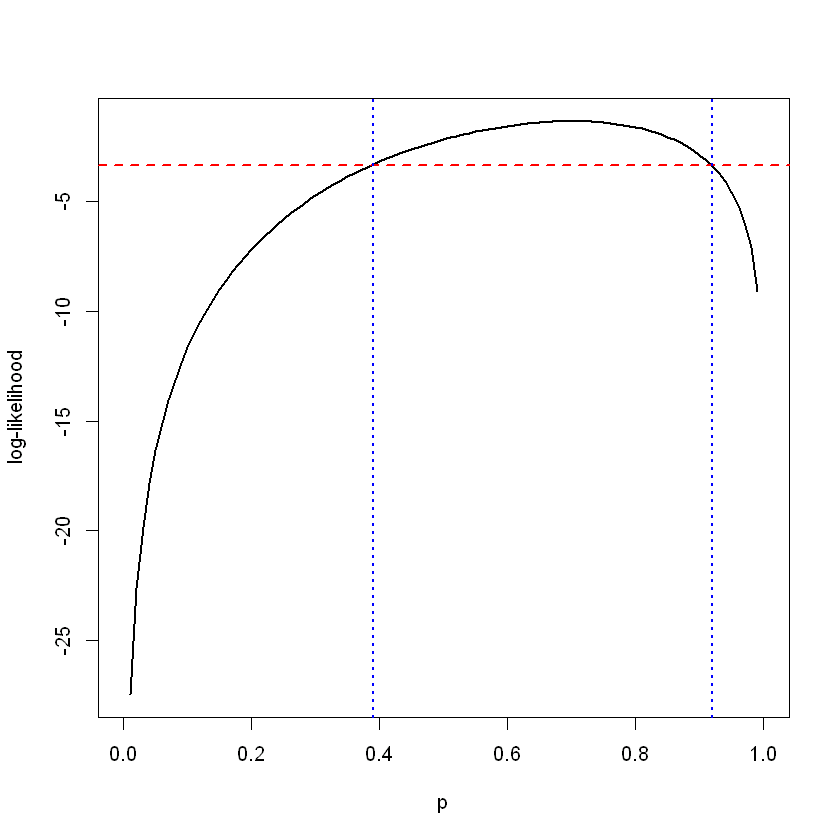

In [4]:
# THE COIN TOSSING LOG-LIKELIHOOD FUNCTION
log.binomial.likelihood<-function(p) {lchoose(10,7)+7*log(p)+3*log(1-p)}
p<-seq(0, 1, 0.01)
log.likelihood.values<-log.binomial.likelihood(p)
plot(p, log.likelihood.values, ylab='log-likelihood', type='l', lwd=2)
# DRAW A LINE 2 UNITS BELOW THE PEAK
abline(h=log.binomial.likelihood(0.7)-2, col='red', lty=2, lwd=2)
# THE 95% C.I.
abline(v=c(0.39, 0.92), col='blue', lty=3, lwd=2)

The intersections between the log-likelihood and the minus-two line are the lower and upper 95% C.I. for $p$, in this case, [0.39, 0.92]. If you want to be ultra precise, you can use <code>uniroot()</code> to find the intersection points. 

#### 3.2 Joint confidence region for a two-parameter model
Obtaining individual C.I.s does not mean we also have found the *joint* confidence region for two or more parameters, as the overall $\alpha$ level cannot be maintained when making multiple comparisons. Corrections (e.g. Bonferroni) can be applied to individual tests to preserve the overall $\alpha$, but the details are not discussed here. Another concern is the correlation among ML estimators. 

The log-likelihood surface for a two-parameter model can be visualised by a 3D plot (via <code>persp()</code>) or a <code>contour()</code> plot. The 95% C.I. for *one* parameter alone can be found using the same -1.92 rule as desbribed above. For the 95% joint confidence region for *both* parameters, we look for a collection of parameter pairs whose log-likelihood is within $0.5*\chi^2_{2, 0.95}=2.99$ units from the maximum. See #4 of <code>recapture.csv</code> notebook for example. 

#### 3.3 Profile likelihood 
Profiling is a generalisation of #3.2. Let us partition the vector of parameters into two subsets: $\underline{\theta}=(\underline{\theta_1},\underline{\theta_2})$. The motivation is to find the C.I. (or region) for $\underline{\theta_1}$. The procedure involves *partial* maximisation of the original log-likelihood along $\underline{\theta_1}$. If we fix $\underline{\theta_1}=\underline{\tilde{\theta_1}}$, then we can vary $\underline{\theta_2}$ such that the log-likelihood is partially maximised. And this value is the profile log-likelihood value at $\underline{\tilde{\theta_1}}$ (we can call it $l^*(\underline{\tilde{\theta_1}})$). And if repeat the same for many other $\underline{\tilde{\theta_1}}$, then we obtain a profile log-likelihood function for the parameter subset $\underline{\theta_1}$. 

Mathematically,$$l^*(\underline{\theta_1})=\max_{\underline{\theta_2}} l(\underline{\theta_1}, \underline{\theta_1}; \underline{x})$$

See today's practical on <code>flowering.txt</code>. The general rule for the 95% joint C.I. (region) for $k$ parameters is the collection of parameter values for which the log-likelihood decreases by no more than half of $\chi^2_{0.95~df=k}$ from its maximum. 

#### 3.4 Confidence interval via normal approximation (Wald C.I.)
##### 3.4.1 Univartiate Wald C.I.
One key property of ML estimators is approximate normality under reasonably large sample size. It means that the 95% C.I. for the true parameter $\theta$ is approximately $\hat{\theta}\pm1.96\sqrt{Var(\hat{\theta})}$. The magic number 1.96 comes from the 2.5- and 97.5-percentile of the standard normal distribution. Wald C.I. (or tests) are extensively used <code>lm()</code> and <code>glm()</code> to indicate the significance of explanatory variables. Have you wondered how the standard errors from a <code>summary()</code> table are computed? In fact, they can be approximated from the curvature of the log-likelihood:
$$Var(\hat{\theta})\approx-\frac{1}{l''(\hat{\theta})}$$
where $l''(\hat{\theta})$ is the second derivative of the log-likelihood function evaluated at $\hat{\theta}$. Note that the second derivative is always negative given it is a maximum therefore a -1 is required to ensure $Var(\hat{\theta})$ is positive. If the log-likelihood is steeper (i.e. descends faster) around its peak then the C.I. should be narrower, thus smaller $Var(\hat{\theta})$. Therefore "steepness" and variance are inversely proportional as reflected in the formula. 

##### 3.4.2 Multivariate case
The principle still holds for multivariate (multiple parameter) case as the ML estimators jointly follow a multivariate normal. In multivariate normal, the "variance" is no longer a number but a variance-covariance matrix $\boldsymbol{V}(\underline{\hat{\theta}})$, with rows and columns equal the number of parameters. Similar to the univariate case, it is related to the second derivative of the log-likelihood surface. Empirically, 
$$\boldsymbol{V}(\underline{\hat{\theta}})\approx-\boldsymbol{H}(\underline{\hat{\theta}})^{-1}$$
$\boldsymbol{H}(\underline{\hat{\theta}})$ is the Hessian matrix, the second derivative of the $l(\underline{\theta})$ evaluated at $\hat{\theta}$. It sounds familiar as we can request <code>hessian=T</code> from <code>optim()</code>. $-\boldsymbol{H}(\underline{\hat{\theta}})$ is also called the observed Fisher information matrix, which tells the amount of information contained towards the parameters. 

The final step is to calculate the negative inverse of the Hessian matrix, which can be completed via the <code>solve()</code> function. With $\boldsymbol{V}(\underline{\hat{\theta}})$ we can infer the Wald C.I. for a single parameter under the usual way, or perform multivariate testing for a collection of parameters. 

“In Author’s experience, the Wald (i.e. normality) and likelihood method can give quite different results when used to test joint hypotheses… The likelihood method can requie more effort to compute, but is generally preferred.” (Milalr 2011)

##### 3.5 Interpretations of C.I.
Classical statistics considers a parameter $\theta$ as a fixed but unknown number. If the experiment is repeated for infinitely many times and that infinitely many $\hat{\theta}$ and 95% C.I. are obtained, then 95% of the C.I.s will cover the true parameter value. 

This concept is completely revolutionised by the Bayesian branch, that it (weirdly) believes $\theta$ can also be a r.v. thus has its own distributions (e.g. prior and posterior distributions). Therefore, making probabilistic statements towards $\theta$ is permitted (i.e. there is 95% chance that $\theta$ is between such as such value). 